En graf som sammenligner temperatur og lufttrykk over tid:

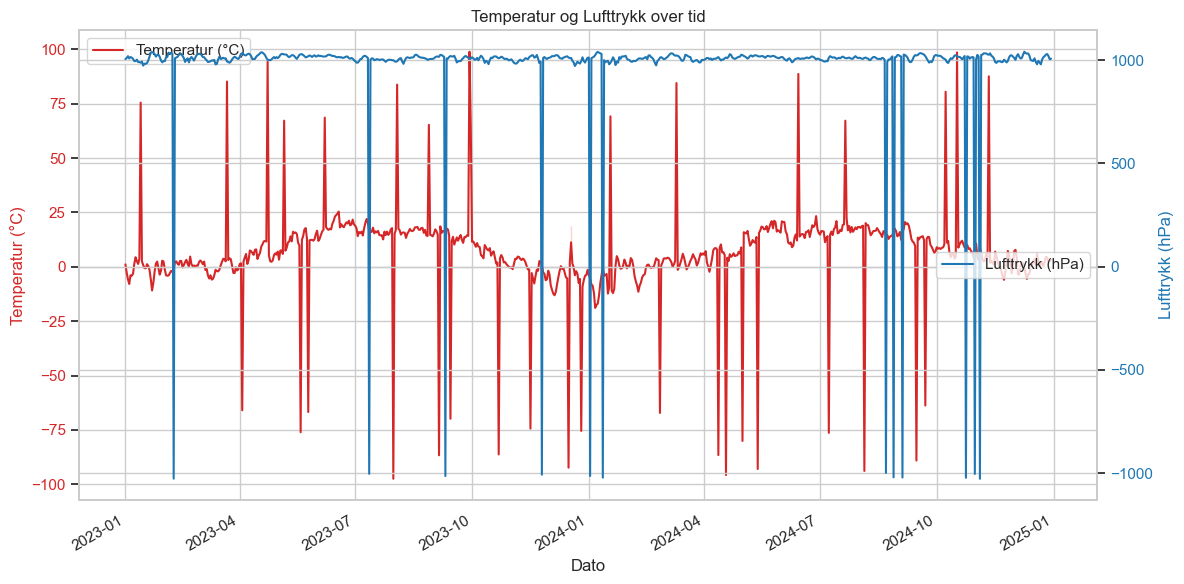

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Velger hvilken stil i Seaborn som skal brukes
sns.set_theme(style="whitegrid")

# Leer inn CSV-filen som skal brukes til å hente data fra
fil = "../data/R_Sammenslaaing_gjsnitt.csv"
df = pd.read_csv(fil)

# Konverterer 'Dato' til datetime-format
df['Dato'] = pd.to_datetime(df['Dato'])

# Plotter temperatur og lufttrykk over tid
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotter temperatur på venstre akse
sns.lineplot(data=df, x='Dato', y='Temperatur (°C)', ax=ax1, label="Temperatur (°C)", color='tab:red')
ax1.set_ylabel("Temperatur (°C)", color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Lager en ny akse for lufttrykk
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Dato', y='Lufttrykk (hPa)', ax=ax2, label="Lufttrykk (hPa)", color='tab:blue')
ax2.set_ylabel("Lufttrykk (hPa)", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Formatér plottet
plt.title("Temperatur og Lufttrykk over tid")
fig.autofmt_xdate()
fig.tight_layout()

plt.show()


Sammenligner nedbør og skydekke over tid:

In [5]:
# Plotter nedbør og skydekke
fig, ax1 = plt.subplots(figsize=(12, 6))

# Viser nedbør som stolpediagram
sns.barplot(data=df, x='Dato', y='Nedbør (mm)', ax=ax1, color='skyblue', label="Nedbør (mm)")
ax1.set_ylabel("Nedbør (mm)", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Lager ny akse for skydekke
ax2 = ax1.twinx()
sns.lineplot(data=df, x='Dato', y='Skydekke (oktas)', ax=ax2, color='gray', label="Skydekke", linewidth=2)
ax2.set_ylabel("Skydekke (oktas)", color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Tittel og layout
plt.title("Nedbør og Skydekke over tid")
fig.autofmt_xdate()
fig.tight_layout()
plt.show()


NameError: name 'plt' is not defined

Scatterplot med regresjon: Temperatur vs Relativ fuktighet

In [ ]:
# Lager et scatterplot med regresjonslinje

plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Temperatur (°C)', y='Relativ fuktighet (%)', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Sammenheng mellom temperatur og relativ fuktighet")
plt.xlabel("Temperatur (°C)")
plt.ylabel("Relativ fuktighet (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


Bruker Plotly til å lage en interaktiv linjegraf for temperatur og lufttrykk over tid

In [6]:
import plotly.graph_objects as go
import pandas as pd

# Les CSV og konverter dato
df = pd.read_csv("..data/R_Sammenslaaing_gjsnitt.csv")
df['Dato'] = pd.to_datetime(df['Dato'])

# Lag figur
fig = go.Figure()

# Temperatur
fig.add_trace(go.Scatter(
    x=df['Dato'], y=df['Temperatur (°C)'],
    mode='lines+markers',
    name='Temperatur (°C)',
    line=dict(color='red')
))

# Lufttrykk
fig.add_trace(go.Scatter(
    x=df['Dato'], y=df['Lufttrykk (hPa)'],
    mode='lines+markers',
    name='Lufttrykk (hPa)',
    line=dict(color='blue'),
    yaxis="y2"
))

# Legg til sekundær y-akse
fig.update_layout(
    title="Interaktiv graf: Temperatur og Lufttrykk over tid",
    xaxis=dict(title="Dato"),
    yaxis=dict(title="Temperatur (°C)", titlefont=dict(color="red"), tickfont=dict(color="red")),
    yaxis2=dict(
        title="Lufttrykk (hPa)",
        titlefont=dict(color="blue"),
        tickfont=dict(color="blue"),
        overlaying="y",
        side="right"
    ),
    legend=dict(x=0.01, y=0.99),
    hovermode="x unified"
)

fig.show()


ModuleNotFoundError: No module named 'plotly'

Interaktiv scatterplot med farge etter relativ fuktighet

In [ ]:
import plotly.express as px

# Interaktiv scatterplot
fig = px.scatter(
    df,
    x='Temperatur (°C)',
    y='Lufttrykk (hPa)',
    color='Relativ fuktighet (%)',
    size='Nedbør (mm)',  # Bonus! boblestørrelse = nedbør
    hover_data=['Dato'],
    color_continuous_scale='Viridis',
    title='Temperatur vs Lufttrykk – farget etter relativ fuktighet'
)

fig.update_layout(
    xaxis_title='Temperatur (°C)',
    yaxis_title='Lufttrykk (hPa)',
    coloraxis_colorbar=dict(title='Relativ fuktighet (%)')
)

fig.show()


Dropdown-meny for å velge variabel over tid

Dette lar deg velge f.eks. “Temperatur”, “Lufttrykk”, “Nedbør” eller “Skydekke” fra en meny og vise den som linjediagram:

In [ ]:
# Lag linjer for alle variablene vi vil kunne velge mellom
variabler = ['Temperatur (°C)', 'Lufttrykk (hPa)', 'Nedbør (mm)', 'Relativ fuktighet (%)', 'Skydekke (oktas)']

# Lag grunnstruktur
fig = go.Figure()

# Legg til én linje per variabel, alle usynlige bortsett fra den første
for i, var in enumerate(variabler):
    fig.add_trace(go.Scatter(
        x=df['Dato'], y=df[var],
        mode='lines+markers',
        name=var,
        visible=(i == 0)
    ))

# Lag dropdown-knappene
buttons = [
    dict(label=var,
         method='update',
         args=[{'visible': [j == i for j in range(len(variabler))]},
               {'title': f"{var} over tid"}])
    for i, var in enumerate(variabler)
]

# Oppdater layout
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=0.1,
        xanchor="left",
        y=1.1,
        yanchor="top"
    )],
    title=f"{variabler[0]} over tid",
    xaxis_title="Dato",
    yaxis_title="Verdi",
    hovermode="x unified"
)

fig.show()


Lager en correlation heatmap som viser hvordan variablene henger sammen:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plukk ut bare tallkolonnene
numeriske_kolonner = df.select_dtypes(include='number')

# Lag korrelasjonsmatrisen
korrelasjon = numeriske_kolonner.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(korrelasjon, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korrelasjonsheatmap for miljødata")
plt.tight_layout()
plt.show()
